# Challenge: Simulated annealing

## 1. Max Cut

### Definition

We are given an undirected graph with vertex set $V$ and edge set $E$. 

Our aim is to partition the graph into two subgraphs connected by the maximum number of edges.


### Path to solving the problem

MaxCut is a maximization problem and its cost function can be cast to an Ising problem through its respective Hamiltonian (see the [Introduction](./introduction.ipynb) and a [reference](https://en.wikipedia.org/wiki/Maximum_cut#Theoretical_physics)),

$$ \displaystyle \large
H = \displaystyle \textstyle\sum\limits_{uv \in E} s_{u} s_{v}
$$

where $v, u \in V$ and $s_u$ is a spin variable, which is $1$ if vertex $u$ is in the one subgraph and $-1$ if it is in the other.

myQLM allows us to encode a problem in this Hamiltonian form by using the `MaxCut` class with some specified graph. We can then create a job from the problem and send it to a Simulated Annealer (SA) wrapped with a Quantum Processing Unit (QPU) interface. The SA will minimize the Hamiltonian, hence we find the best solution to our problem.


In [1]:
# Misc imports
import numpy as np
import matplotlib.pyplot as plt
import scipy

from qat.qpus import SimulatedAnnealing
from qat.simulated_annealing import integer_to_spins
from qat.core import Variable

import networkx as nx

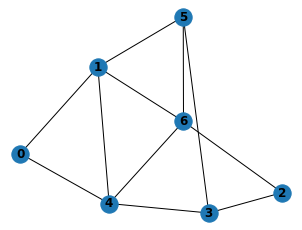

In [2]:
graph = nx.generators.random_graphs.erdos_renyi_graph(7, .55)

N_nodes = len(graph.nodes)
pos=nx.spring_layout(graph)

plt.figure(figsize=(4,3))
nx.draw(graph, with_labels=True, font_weight='bold', pos=pos)


To represent the problem as an Ising problem, how many spins do you need?

Answer: 

In [3]:
from qat.opt import MaxCut

_Instantiate a MaxCut object_

_Extract the evolution parameters for Simulated Annealing from the problem object_

_Create a temperature schedule and a QPU_

_Create a job and send it to the QPU_

_Extract and print solution configuration_

_Draw the colored subgraphs_

Hint: look for the drawing function of networkx

## 2. Simple optimization problem: diving deeper

_Prepare again simulator if you think it is necessary_

In [9]:
#...
sa_qpu = SimulatedAnnealing(...)

## 2.1 Minimization
Let's minimize $y= -5x_1 -3x_2 -8x_3 -6x_4 +4x_1x_2 +8x_1x_2 +2x_2x_3 +10x_3x_4$ 

_Search for information about QUBO_

_Write the Q matrix and use it to create a QUBO representation of this problem._

_Create a transverse field schedule and submit your job_

_Print out the solution as spin variables (Ising formulation) and as binary variables (QUBO)_

_Calculate the minimum energy of the solution_

## 2.2 Maximization
_Maximize the same function_

## 3. Back to the Max-cut problem
### Without the MaxCut class

- _Taking inspiration from the cost function given at the very beginning of this notebook, build the matrix J, the vector h and the offset O with the graph parameters._
- _Construct an Ising problem_

_Run the simulation to find the maximum cut_

_Analyze and display your results_

## 4. ODE resolution

### 4.1 Float vector

In [22]:
from qat.qpus import SimulatedAnnealing
import numpy as np
from qat.core import Variable
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import itertools

We will implement a method to solve the following ODE 
$$u'' -G u'- ku = 0 \ \ \ \  (1)$$

with simulated annealing.

In [23]:
k=1/10
G=-1/50

How do you write this equation in finite difference terms? The solution u will be considered as a 50-point vector.  

Hint1: let's forget about binary/Ising variables for the moment.

Hint2: What is the linear operator corresponding to the derivative? Think about its definition with dx=1.

Once you have done this, you should realize that the problem became a resolution of a system of linear equations.

How can you rewrite it as a minimization?

Write the function to minimize that we'll call cost function and minimize it with scipy. Do not consider boundaries conditions yet.

Modify the cost function and/or the minimization procedure to consider boundary conditions.

We will use in the rest of this notebook:
- u(0) = 3
- u(1) = 2.5

Plot the solution

You should have obtained a vector of size 50 and type float. Let's call it best_sol.

_What is the minimum value of the cost function_

### Binary formulation
So far, the solution u is represented as a vector with the type float. In annealing, the output variables are binaries and so we need to recast our problem with this constraint. 

We will consider a fixed float approach to represent real numbers. Let's start by using 5 bits, this the MSB corresponding to 2 and the LSB to 0.125.

Write the float2bin and bin2float functions that convert from float to this binary representation. 

In [34]:
N_bits=5

Test it on the boundary conditions. Your function should return
- u(0) $\rightarrow$ float2bin(3) = [1,1,0,0,0]
- u(1) $\rightarrow$ float2bin(2.5) = [1,0,1,0,0]

_Transform the operators and the boundary conditions previously used in this representation_

What are the size of each operator?

Once again, find the solution of the ODE via a minimization using scipy and the objects in the fixed float representation

The solution vector will still contain float numbers because you are using scipy and presumably an optimizer that does not constrain the variables to be binary (or even between 0 and 1). It is ok here because we just want to be sure you transformed well everything.

In the case where we use a lot of bits, there should be a solution where the vector values are 0 or 1. 

_Transform back the solution vector with the bin2float function and retrieve the solution vector that you obtain with the real operators. Make sure you have the same vector or that the cost function have the same minimum value with both solutions._

_Plot the solution with matplotlib._

Optional: You must have obtained a vector of size 50*p (p is a number related to the fixed float representation, what is it?). Since we used scipy, this vector is of type float (while we wanted binary). Let's cheat a bit: 

Transform this vector to a vector v2 of size 50 with bin2float. Normally, you should get something very close to best_sol. Now, transform v2 with float2bin. This gives you v3, the binary decomposition of your solution. Transform v3 again with bin2float to get best_sol_from_bin and plot it. 

What we did here is to truncate the part that cannot be represented with the fixed float approach and a finite number of qubits. 

### 3.3 Minimize the cost function with the SA simulator
**Express the problem as a QUBO problem**


Now that you have these operators in fixed float representation, you are close to solve the ODE with an annealer. 

We will rewrite the minimization problem as a QUBO problem.

_First, create the Q matrix of the problem without considering boundary conditions_

Find a way to include boundaries conditions

Hint: think in terms of penalty terms

Create the QUBO problem 

**Annealing simulation**

_Instantiate a new Simulated annealing QPU and define the parameters to run the simulation. Optimize the parameters to get the best solution if needed._

Transform the binary vector that the simulator outputs to a float vector (with bin2float) and plot it. 

You can overlap the solutions you obtained with scipy from section 3.1 and 3.2. 

Calculate the value of the cost function from the Q matrix and the offset you have used for the near best solution (section 3.2) and the annealing solution.

How close are they? If they are not as close as you like, what could you do?

## Extra

Write a plugin that takes an equation as input and submit the corresponding qubo problem to the QPU. 

In [62]:
from qat.plugins import AbstractPlugin

In [63]:
class ODE_solver(AbstractPlugin):
    def __init__(self, equation, *args, **kwargs ):
        pass
    
    def compile(self):
        pass

stack = ODE_solver(equation = [1,G,k]) | sa_qpu

#stack.submit(job)